In [1]:
import sys
import random
sys.path.append("..")
from data import Lyric
from utils import model, attention_visualization

In [2]:
dataset = Lyric(batch_size=128, fix_length=32, target_vocab_size=10000)
net = model(dataset, model_name="周杰伦_50.pkl", train=False)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/dy/xjy0y7v97js5x1bghby2fnkm0000gn/T/jieba.cache
Loading model cost 0.844 seconds.
Prefix dict has been built succesfully.


In [3]:
def generator(title, total_sentence=16):
    encoder_input = dataset.process(title)
    song = []
    for i in range(total_sentence):
        s = []
        output = net.predict(encoder_input)
        word = dataset.logist2word(output)[0]
        if word in dataset.itos[:50] + [s[0] for s in song[-3:]]:
            word = dataset.logist2word(output, topn=3)
            word = random.choice(word)
        next_input = dataset.stoi[word]
        s.append(word)
        while word != "<eos>":
            output = net.next(next_input)
            word = dataset.logist2word(output)[0]
            next_input = dataset.stoi[word]
            s.append(word)
        song.append(s[:-1])
        encoder_input = dataset.process("".join(s[:-1]))
    song = ["".join(s) for s in song]
    return song

In [5]:
generator("窗外的麻雀在电线杆上多嘴")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['你说这一句很有夏天的感觉',
 '手中的夕阳是我的歌',
 '吹着我的心',
 '你说爱我没有',
 '对不起',
 '广场上的月光',
 '我将温暖放在胸口',
 '让我爱上有你的黑夜',
 '无声的眼泪',
 '残留在记忆中',
 '如电话在练习',
 '我的音乐',
 '在你胸口轻轻叹息',
 '你的嘴角那给我',
 '想的的是你我的',
 '所以是你已经真了']

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


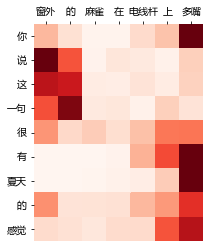

In [4]:
attention_visualization(dataset, net, "窗外的麻雀在电线杆上多嘴", "你说这一句很有夏天的感觉", file_name="1")

In [4]:
generator("从前从前有个人爱你很久", total_sentence=10)

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['但偏偏风渐渐把距离吹得好远',
 '好不容易又能再多爱一天',
 '但故事的最后你好像还是说了拜拜',
 '只想要给我一首歌的时间',
 '你低头地亲吻我',
 '我却微笑绝不说',
 '认真的我都不说',
 '琴弦的嘴却配着我的模样',
 '那一块梦就像画一在那张里',
 '而我看不见你的脸']

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


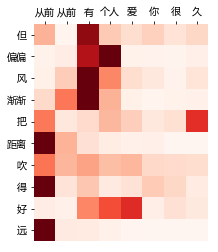

In [7]:
attention_visualization(dataset, net, "从前从前有个人爱你很久", "但偏偏风渐渐把距离吹得好远", file_name="2")

In [6]:
generator("花海晴天")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['远方的爱情在很远的想念',
 '当我遇见你是一种很简单的人',
 '就算我是你身边那是一场悲剧',
 '我的爱是我想你是唯一的出口',
 '牵着我在我身旁',
 '绕过那海鸥',
 '风吹你出现',
 '我只有你知道我',
 '这一切都是很美',
 '我想再等你的模样',
 '想回到过去的梦',
 '重新去爱上你',
 '你要我怎么说',
 '怎么怎么想',
 '雨雨了断了就走了就走了',
 '雨不等我的期待还不了']

In [11]:
generator("不能说的秘密")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['冷咖啡离开了杯垫',
 '你手起来',
 '就像冰的的甜蜜',
 '只让我们有不同的',
 '天真的',
 '天涯如酒',
 '目光如酒',
 '风乱吹',
 '冬天',
 '只剩下钢琴',
 '广场的老片浪漫的钟',
 '那是谁被的名和名和期待',
 '雨下的一片彩虹',
 '一股拉着让我把爱放',
 '让我爱上只会不爱牛奶',
 '连一起来不掉泪']

In [15]:
generator("十年")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['我想对你说',
 '也可以让我知道',
 '但不是别人开着唱着',
 '不想都是很喜欢你',
 '你说你说你跟我',
 '不需要我的结果',
 '全都被期待',
 '哦真心话',
 '我说你说你爱你',
 '你说你爱他',
 '把爱现在都没有',
 '你说你爱到了尽头',
 '只是我给你爱',
 '没有你的世界就像我一样',
 '每天都会这么想',
 '比冬天的温柔']

In [16]:
generator("东风破")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['一盏离愁的日出',
 '花开了你是否还美丽',
 '像我说你没有你才完美',
 '我不要你的音乐',
 '就像我将它成了你的下',
 '你的微笑慢慢酝酿',
 '我的心跳你的温柔',
 '想给你穿梭的时间',
 '你说你会相信别人',
 '会不会会不会',
 '我想你是难过',
 '这街上太好',
 '不是我不好',
 '只是我没有人能说',
 '但我不知道你要怎么会',
 '有什么意义要怎么继续']

In [21]:
generator("一千年以后")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['我们不再被拥有',
 '故事的声音',
 '我们在地平线上睡着',
 '不同的我们',
 '我想我只能说的',
 '拆这的感觉',
 '好想再来唱我的妈妈',
 '拿着读着的歌谣',
 '把它忘在胸口里',
 '记得那老的回忆',
 '回忆是雨的下',
 '哭得好了',
 '那是下了力气',
 '别再想那躲',
 '别再想我',
 '没有你的感觉']